<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Final Project</h1></center>

<b>Group_ID: <code>7</code><b>

<b>Group Members:</b>  

1. <code>Xiaoting_B00685239</code>
2. <code>Xuelian_B00977221</code>
3. <code>Siqi_B00976996</code>

# 1. Dataset Information 

<h4> Dataset Name: <code> Airlines</code></h4>
<h4> Link to the Dataset: <code>https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction</code> </h4>
<h4> Dataset Description: </h4>
<code> This data set collects passenger information from an airline, including personal information and information on flying habits. </code>


# 2. Task Information 

<h4> Task Goal: <code> Evaluate which factors are highly correlated with satisfaction. </code></h4>
<h4> Task Description: </h4>
    <code>This task assesses passenger satisfaction levels based on the information provided and in-flight preferences such as seat position, in-flight beverages and entertainment. Additionally, this task will build four ML models for comparison, which are respectively logistic regression, random forest, KNN and naive bayes. </code>

# 3. Task Implementation: Coding

### 3.1 Preprocessing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [4]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [5]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
df['Unnamed: 0'].unique()

array([     0,      1,      2, ..., 103901, 103902, 103903], dtype=int64)

Finding and Processing:  
1. The first column: Unnamed:0 is the number of index. We decided to delete it.
2. "id" is not relevant to our learning process. We decided to delete it.
3. Categorized features and label need to be changed to number:Gender/Customer Type/Type of Travel/Class/satisfaction
4. Other continuous feature need to be normalized: Age/Flight Distance/Departure Delay in Minutes/Arrival Delay in Minutes

In [7]:
df=df.drop(['Unnamed: 0','id'],axis = 1)

In [8]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [9]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [10]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Customer Type'] = label_encoder.fit_transform(df['Customer Type'])
df['Type of Travel'] = label_encoder.fit_transform(df['Type of Travel'])
df['Class'] = label_encoder.fit_transform(df['Class'])
df['satisfaction'] = label_encoder.fit_transform(df['satisfaction'])

In [13]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


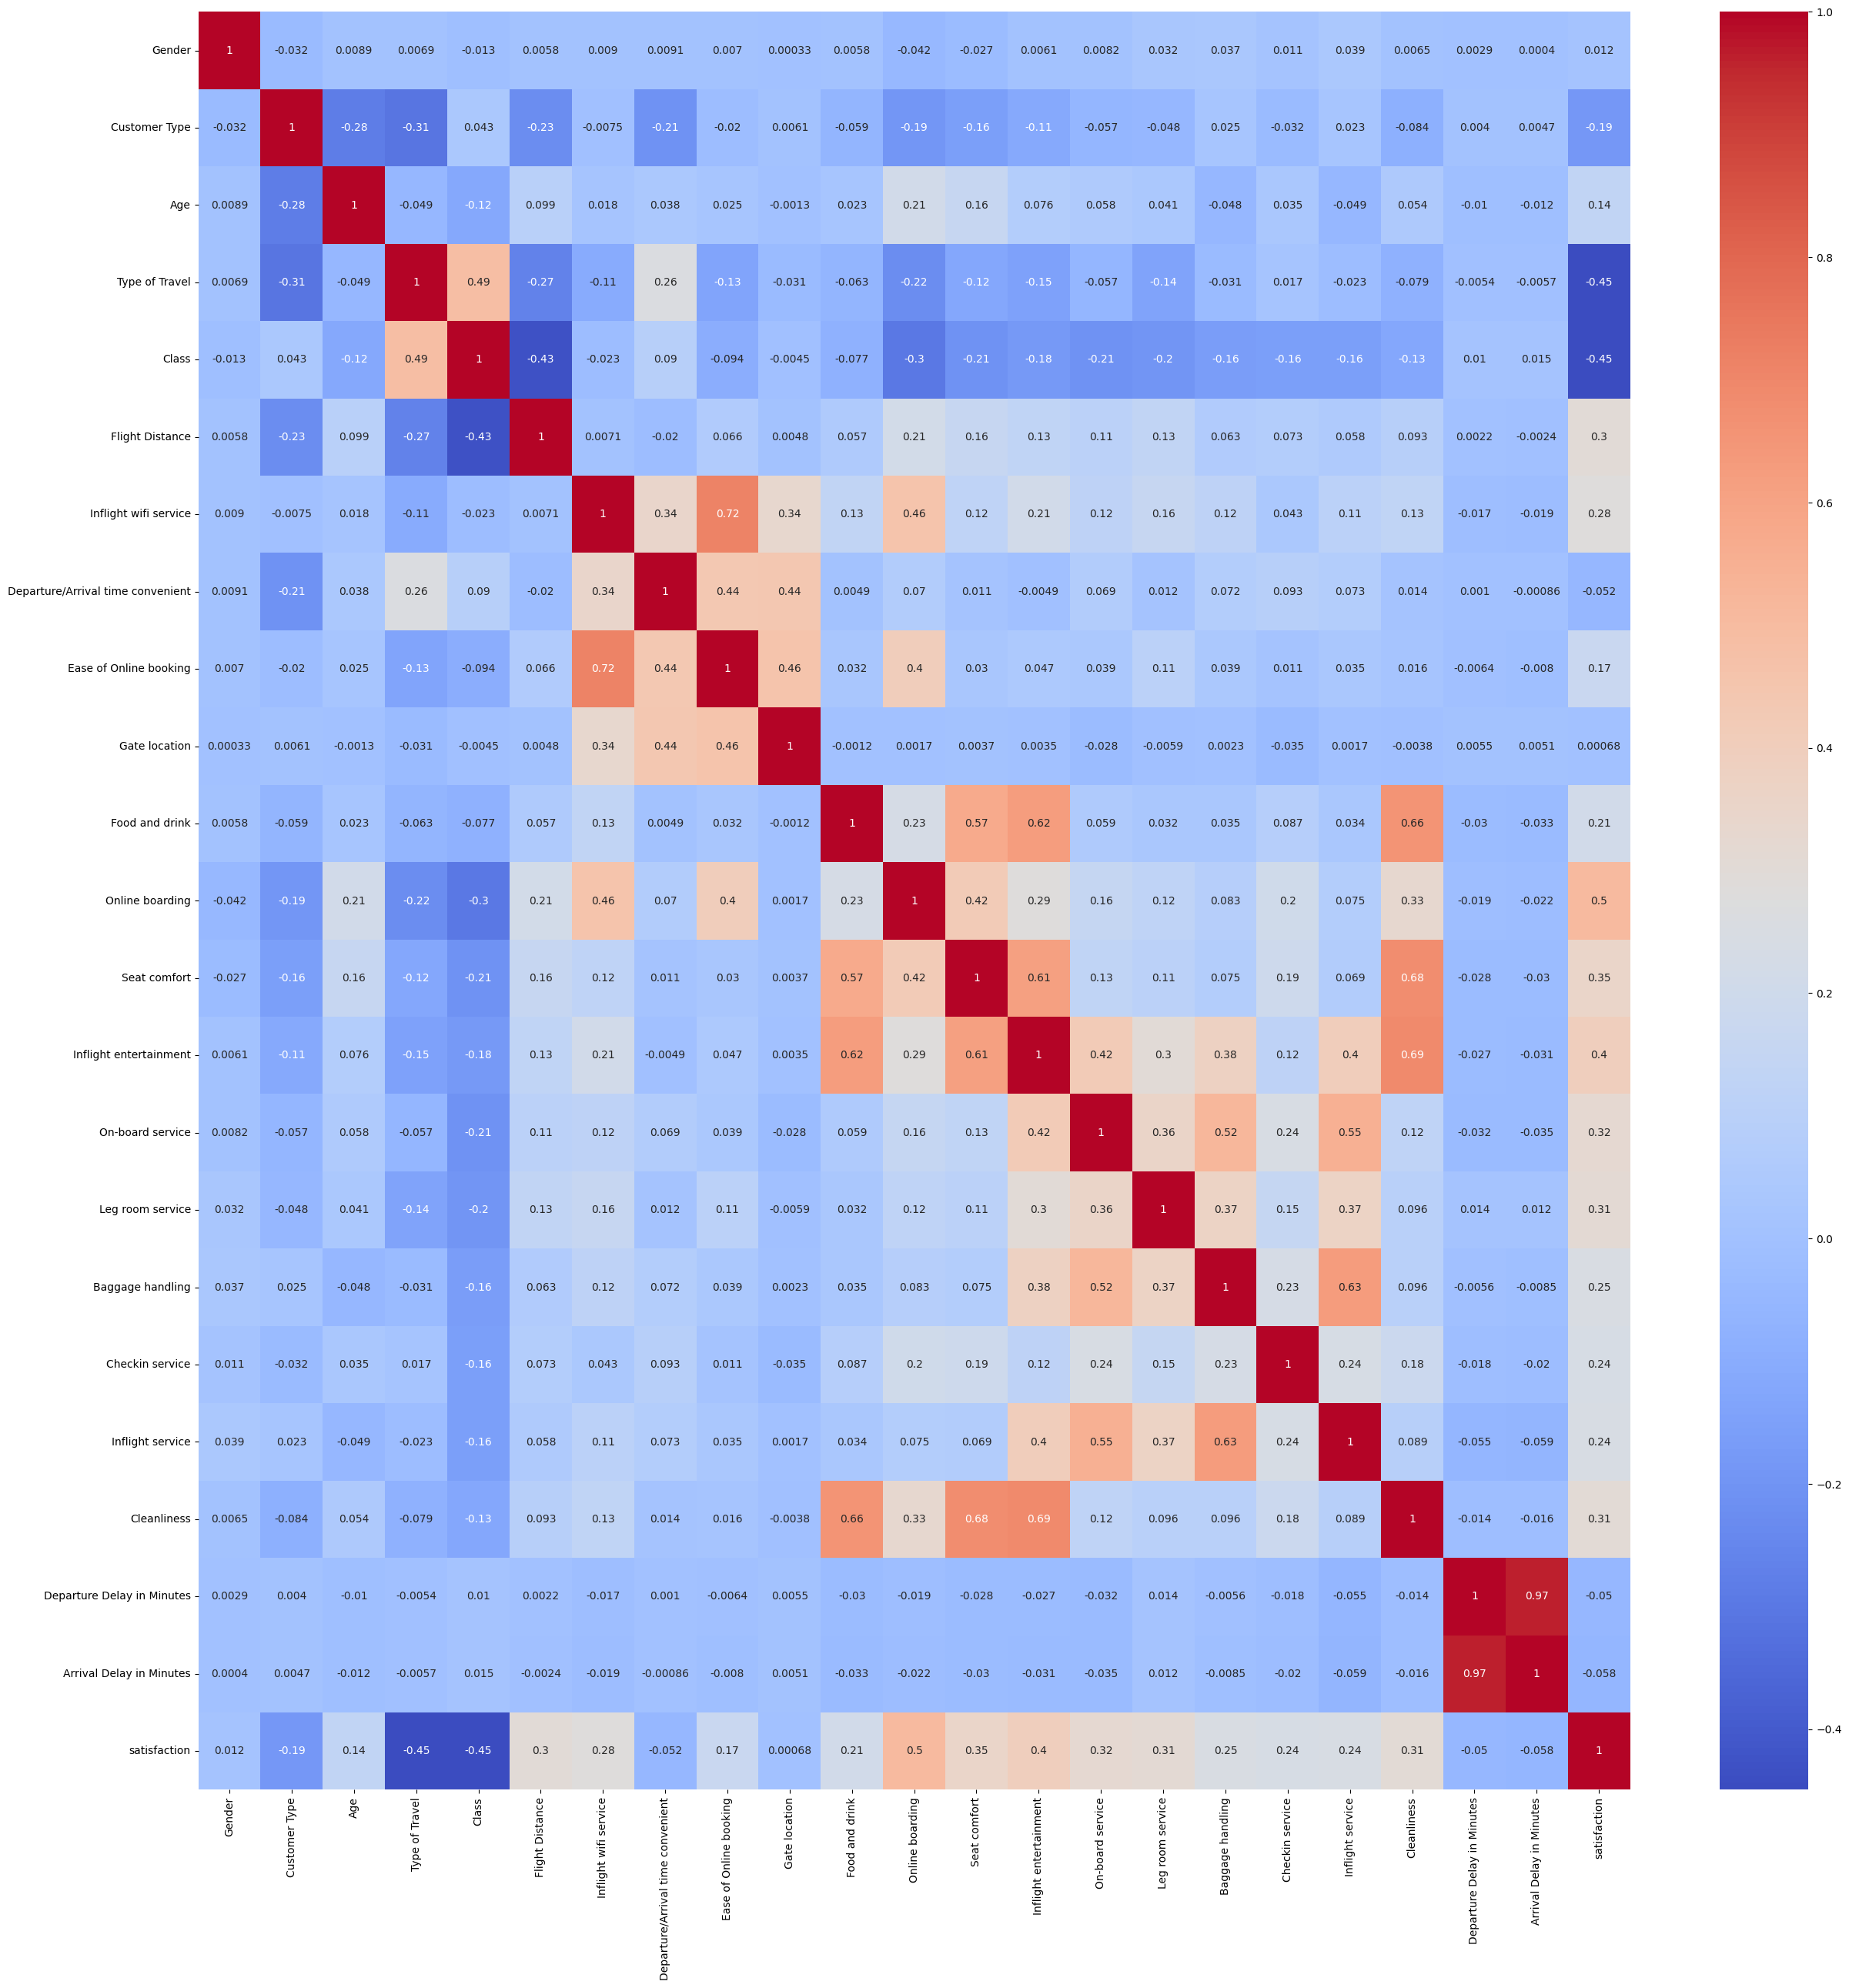

In [14]:
heatmap=df.corr()
sns.heatmap(heatmap,annot=True,cmap='coolwarm')
plt.gcf().set_size_inches(30, 30)

**From the above plot, we know that ease of online booking and inflight wifi service has a higher postive correlationship. Cleanliness and food and drink, seat comfort and inflight entertainment have higher positive correlationship. Baggage handling and inflight service has a higher positive correlationship.Regarding to the final target:satisfaction, it has very little correlationship with Gender and Gate location**

*For those have low correlationship with the target(satisfaction), plot the pictures below to decide whether delete them：  
Gender  
Gate Location*

In [15]:
ratio_male = round(len(df[(df['Gender'] == 0) & (df['satisfaction'] == 1)])/len(df[(df['Gender'] == 0)]),2)
ratio_female = round(len(df[(df['Gender'] == 1) & (df['satisfaction'] == 1)])/len(df[(df['Gender'] == 1)]),2)
print(ratio_male)
print(ratio_female)

0.43
0.44


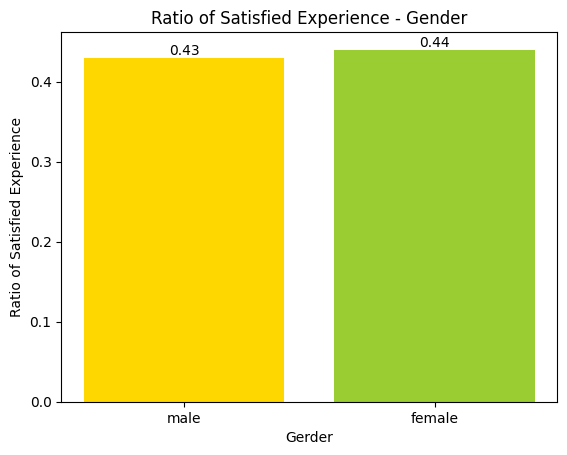

In [16]:
categories = ['male','female']
ratios = [ratio_male,ratio_female]
plt.bar(categories, ratios, color=['gold', 'yellowgreen'])
plt.xlabel('Gerder')
plt.ylabel('Ratio of Satisfied Experience')
plt.title('Ratio of Satisfied Experience - Gender')

for i in range(len(categories)):
    plt.text(categories[i], ratios[i], str(ratios[i]), ha='center', va='bottom')

plt.show()

In [17]:
ratio_gl0 = round(len(df[(df['Gate location'] == 0) & (df['satisfaction'] == 1)])/len(df[(df['Gate location'] == 0)]),2)
ratio_gl1 = round(len(df[(df['Gate location'] == 1) & (df['satisfaction'] == 1)])/len(df[(df['Gate location'] == 1)]),2)
ratio_gl2 = round(len(df[(df['Gate location'] == 2) & (df['satisfaction'] == 1)])/len(df[(df['Gate location'] == 2)]),2)
ratio_gl3 = round(len(df[(df['Gate location'] == 3) & (df['satisfaction'] == 1)])/len(df[(df['Gate location'] == 3)]),2)
ratio_gl4 = round(len(df[(df['Gate location'] == 4) & (df['satisfaction'] == 1)])/len(df[(df['Gate location'] == 4)]),2)
ratio_gl5 = round(len(df[(df['Gate location'] == 5) & (df['satisfaction'] == 1)])/len(df[(df['Gate location'] == 5)]),2)

print(ratio_gl0)
print(ratio_gl1)
print(ratio_gl2)
print(ratio_gl3)
print(ratio_gl4)
print(ratio_gl5)

1.0
0.5
0.46
0.35
0.39
0.57


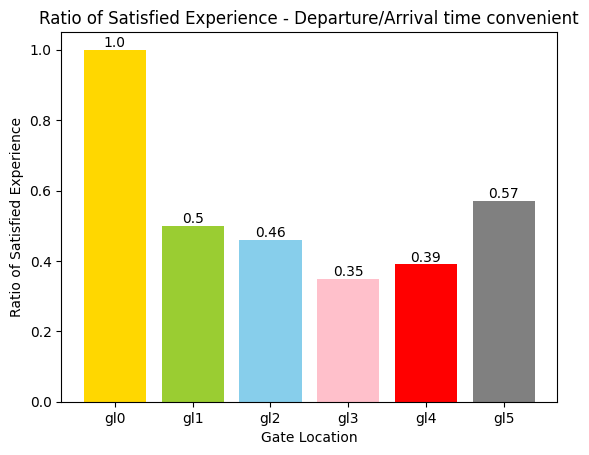

In [18]:
categories = ['gl0','gl1','gl2','gl3','gl4','gl5']
ratios = [ratio_gl0,ratio_gl1,ratio_gl2,ratio_gl3,ratio_gl4,ratio_gl5]
plt.bar(categories, ratios, color=['gold', 'yellowgreen','skyblue','pink','red','grey'])
plt.xlabel('Gate Location')
plt.ylabel('Ratio of Satisfied Experience')
plt.title('Ratio of Satisfied Experience - Departure/Arrival time convenient')

for i in range(len(categories)):
    plt.text(categories[i], ratios[i], str(ratios[i]), ha='center', va='bottom')

plt.show()

*Through the plots above, we decided to delete the gender column which has almost no effects on the final target results as no matter whether the customer is female or male, there is almost no difference on choosing the experience feeling*

In [19]:
df_train=df
df_train = df_train.dropna(axis=0)
df_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [20]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['Age', 'Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes']
scaler = MinMaxScaler()
df_train[columns_to_normalize] = scaler.fit_transform(df_train[columns_to_normalize])
df_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,0.076923,1,2,0.086632,3,4,3,1,...,5,4,3,4,4,5,5,0.015704,0.011364,0
1,1,1,0.230769,0,0,0.041195,3,2,3,3,...,1,1,5,3,1,4,1,0.000628,0.003788,0
2,0,0,0.243590,0,0,0.224354,2,2,2,2,...,5,4,3,4,4,4,5,0.000000,0.000000,1
3,0,0,0.230769,0,0,0.107229,2,5,5,5,...,2,2,5,3,1,4,2,0.006910,0.005682,0
4,1,0,0.692308,0,0,0.036955,3,3,3,3,...,3,3,4,4,3,3,3,0.000000,0.000000,1


Processing the original test data csv:

In [21]:
df_test=pd.read_csv('test.csv')

In [22]:
df_test = df_test.dropna(axis=0)

In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25893 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25893 non-null  int64  
 1   id                                 25893 non-null  int64  
 2   Gender                             25893 non-null  object 
 3   Customer Type                      25893 non-null  object 
 4   Age                                25893 non-null  int64  
 5   Type of Travel                     25893 non-null  object 
 6   Class                              25893 non-null  object 
 7   Flight Distance                    25893 non-null  int64  
 8   Inflight wifi service              25893 non-null  int64  
 9   Departure/Arrival time convenient  25893 non-null  int64  
 10  Ease of Online booking             25893 non-null  int64  
 11  Gate location                      25893 non-null  int64  


In [24]:
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [25]:
df_test=df_test.drop(['Unnamed: 0','id'], axis=1)
df_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [26]:
df_test['Gender'] = label_encoder.fit_transform(df_test['Gender'])
df_test['Customer Type'] = label_encoder.fit_transform(df_test['Customer Type'])
df_test['Type of Travel'] = label_encoder.fit_transform(df_test['Type of Travel'])
df_test['Class'] = label_encoder.fit_transform(df_test['Class'])
df_test['satisfaction'] = label_encoder.fit_transform(df_test['satisfaction'])

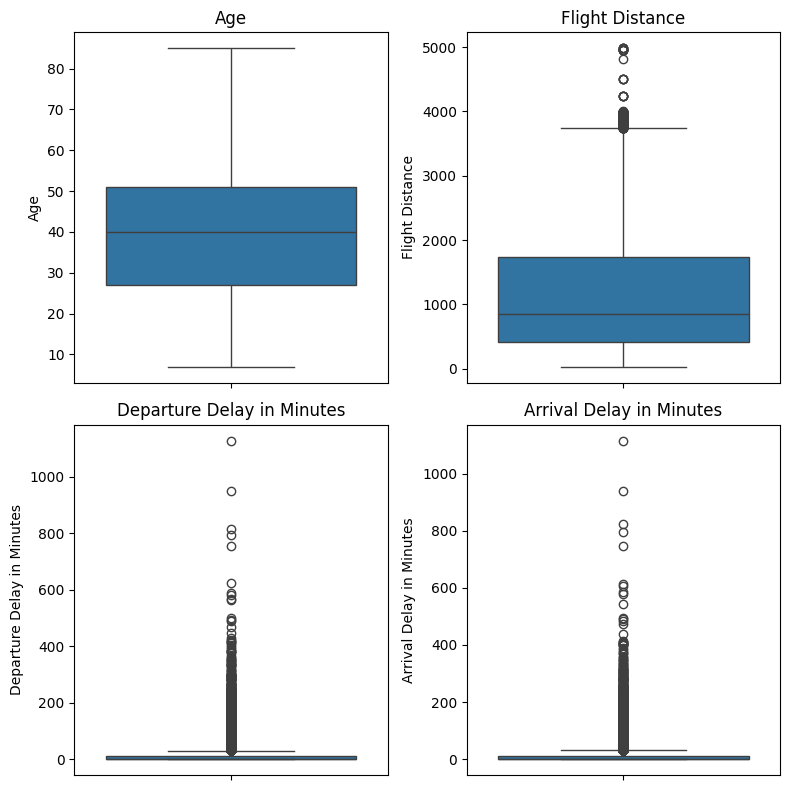

In [27]:
continuous_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes']
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting boxplots for continuous columns to identify outliers
plt.figure(figsize=(8, 8))

for i, col in enumerate(continuous_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_test[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [28]:
columns_to_normalize = ['Gender','Age', 'Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes']
scaler = MinMaxScaler()
df_test[columns_to_normalize] = scaler.fit_transform(df_test[columns_to_normalize])
df_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.0,0,0.576923,0,1,0.026050,5,4,3,4,...,5,5,5,5,2,5,5,0.044326,0.039462,1
1,0.0,0,0.371795,0,0,0.571890,1,1,3,1,...,4,4,4,4,3,4,5,0.000000,0.000000,1
2,1.0,1,0.166667,0,1,0.032512,2,0,2,4,...,2,4,1,3,2,2,2,0.000000,0.000000,0
3,1.0,0,0.474359,0,0,0.675687,0,0,0,2,...,1,1,1,1,3,1,4,0.000000,0.005381,1
4,0.0,0,0.538462,0,1,0.232431,2,3,4,3,...,2,2,2,2,4,2,4,0.000000,0.017937,1


In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25893 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25893 non-null  float64
 1   Customer Type                      25893 non-null  int32  
 2   Age                                25893 non-null  float64
 3   Type of Travel                     25893 non-null  int32  
 4   Class                              25893 non-null  int32  
 5   Flight Distance                    25893 non-null  float64
 6   Inflight wifi service              25893 non-null  int64  
 7   Departure/Arrival time convenient  25893 non-null  int64  
 8   Ease of Online booking             25893 non-null  int64  
 9   Gate location                      25893 non-null  int64  
 10  Food and drink                     25893 non-null  int64  
 11  Online boarding                    25893 non-null  int64  


### 3.2 Model development and training 

#### 3.2.1 Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
X_train = df_train.iloc[:,0:22]
y_train = df_train.iloc[:,-1]
X_test = df_test.iloc[:,0:22]
y_test = df_test.iloc[:,-1]


In [31]:
from sklearn.model_selection import GridSearchCV

# define param grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2','elasticnet'],
    'tol': [1e-4, 1e-3, 1e-2],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# build model
logistic = LogisticRegression(max_iter=1000)

# GridSearchCV
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# get best params and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# use best params
best_logistic = LogisticRegression(**best_params, max_iter=1000)
best_logistic.fit(X_train, y_train)
y_pred_best = best_logistic.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
class_report = classification_report(y_test, y_pred_best)

print("Classification Report:\n", class_report)
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)
print("Test Set Accuracy:", accuracy_best)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89     14528
           1       0.87      0.83      0.85     11365

    accuracy                           0.87     25893
   macro avg       0.87      0.87      0.87     25893
weighted avg       0.87      0.87      0.87     25893

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}
Best Cross-Validation Score: 0.8755719852758717
Test Set Accuracy: 0.8712393310933457


##### 3.2.1.1 Model evaluation

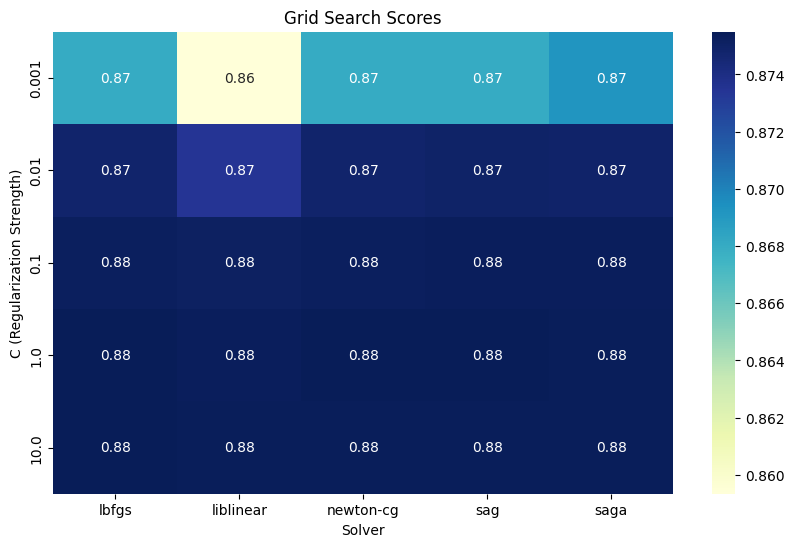

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# get result
results = pd.DataFrame(grid_search.cv_results_)

# choose parameters
param_1 = 'param_C'
param_2 = 'param_solver'

# plot
pivot_table = results.pivot_table(values='mean_test_score', 
                                  index=[param_1], 
                                  columns=[param_2])

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Grid Search Scores')
plt.xlabel('Solver')
plt.ylabel('C (Regularization Strength)')
plt.show()


#### 3.2.2 KNN Classifier 

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

X_train = df_train.iloc[:,0:22]
y_train = df_train.iloc[:,-1]
X_test = df_test.iloc[:,0:22]
y_test = df_test.iloc[:,-1]


KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = KNN.predict(X_test.to_numpy())

cm = classification_report(y_test.to_numpy(),y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     14528
           1       0.96      0.88      0.92     11365

    accuracy                           0.93     25893
   macro avg       0.94      0.93      0.93     25893
weighted avg       0.93      0.93      0.93     25893



##### 3.2.2.1 Hyperparameter tune

In [34]:
k_range = range(1,50)
k_scores = []


#for i in cv_range:
for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(KNN, X_train.to_numpy(), y_train.to_numpy(), cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    #cv_scores[i,:] = k_scores
print(k_scores)
print(k_scores.index(max(k_scores)))

[0.9228912895767802, 0.9214723017047085, 0.9310578261642555, 0.9280557521652222, 0.9325444132850735, 0.9296677976847395, 0.9325540685901244, 0.9299573962692991, 0.9324478900521471, 0.9300346247327134, 0.9322065614702453, 0.9296002198673788, 0.9313474405894041, 0.929687112022038, 0.931038520213151, 0.9292333946830038, 0.930295236902535, 0.9286735248963746, 0.929532643913617, 0.9279591935239198, 0.9288569337613646, 0.9272738196804224, 0.9282101615702834, 0.9270324836441256, 0.927910922589463, 0.9266849905012371, 0.9273510518710346, 0.9261637437984094, 0.9266849942284348, 0.9256424756641959, 0.9262602511907465, 0.9254011349689021, 0.9259030859704188, 0.9250053597099643, 0.9253818178362053, 0.9247833380109661, 0.9254204343974111, 0.924783339874565, 0.9252466854964684, 0.92430069855135, 0.9248412679776712, 0.9238759676270536, 0.924348959236014, 0.9235380962444385, 0.9240207534082424, 0.9233064304219821, 0.9237601188752362, 0.9230458005479727, 0.9237408082651349]
6


Text(0, 0.5, 'Cross-Validated Accuracy')

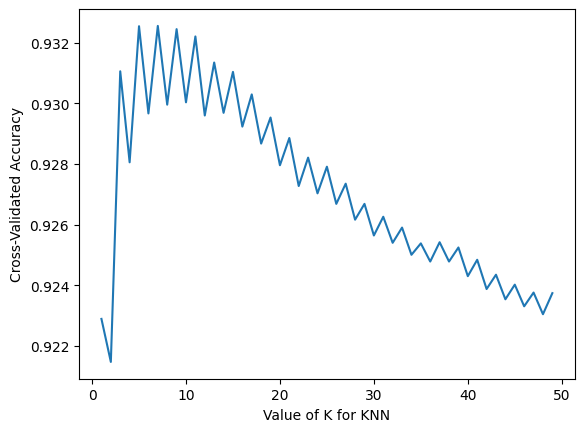

In [35]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

##### 3.2.2.2 Model evaluation

In [36]:
KNN = KNeighborsClassifier(n_neighbors=k_range[k_scores.index(max(k_scores))])
KNN.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = KNN.predict(X_test.to_numpy())

cm = classification_report(y_test.to_numpy(),y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     14528
           1       0.95      0.90      0.92     11365

    accuracy                           0.93     25893
   macro avg       0.94      0.93      0.93     25893
weighted avg       0.93      0.93      0.93     25893



#### 3.2.3 Naive Bayers

In [37]:
from sklearn.naive_bayes import GaussianNB
GaussNB = GaussianNB()
GaussNB.fit(X_train, y_train)
y_pred = GaussNB.predict(X_test)
cm = classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     14528
           1       0.86      0.81      0.84     11365

    accuracy                           0.86     25893
   macro avg       0.86      0.86      0.86     25893
weighted avg       0.86      0.86      0.86     25893



In [38]:
from sklearn.naive_bayes import BernoulliNB
BernoNB = BernoulliNB(force_alpha=True)
BernoNB.fit(X_train, y_train)
y_pred = BernoNB.predict(X_test)
cm = classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.82      0.77      0.79     14528
           1       0.73      0.78      0.75     11365

    accuracy                           0.78     25893
   macro avg       0.77      0.78      0.77     25893
weighted avg       0.78      0.78      0.78     25893



In [39]:
from sklearn.naive_bayes import MultinomialNB
MultiNomNB = MultinomialNB()
MultiNomNB.fit(X_train, y_train)
y_pred = MultiNomNB.predict(X_test)
cm = classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     14528
           1       0.79      0.79      0.79     11365

    accuracy                           0.82     25893
   macro avg       0.82      0.81      0.81     25893
weighted avg       0.82      0.82      0.82     25893



#### 3.2.4 Random Forest Classifier 

In [40]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [41]:
X_train = df_train.iloc[:,0:22]
y_train = df_train.iloc[:,-1]
X_test = df_test.iloc[:,0:22]
y_test = df_test.iloc[:,-1]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [42]:
rf_classifier = RandomForestClassifier(random_state=42)

##### 3.2.4.1 Hyperparameter tune 

In [43]:
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
}

In [44]:
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='accuracy')

In [45]:
print("Best Hyperparameters_RandomSearch:", random_search.best_params_)

Best Hyperparameters_RandomSearch: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}


In [46]:
best_rf_model_Random = random_search.best_estimator_
y_pred = best_rf_model_Random.predict(X_val)

In [47]:
accuracy = accuracy_score(y_val, y_pred)
print("Random Search Validation Accuracy:", accuracy)

Random Search Validation Accuracy: 0.9622568656788455


In [48]:
confusion_mat = confusion_matrix(y_val, y_pred)
print("Random Search Confusion Matrix:\n", confusion_mat)

Random Search Confusion Matrix:
 [[11427   228]
 [  554  8510]]


In [49]:
class_report = classification_report(y_val, y_pred)
print("Random Search Classification Report:\n", class_report)

Random Search Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     11655
           1       0.97      0.94      0.96      9064

    accuracy                           0.96     20719
   macro avg       0.96      0.96      0.96     20719
weighted avg       0.96      0.96      0.96     20719



In [50]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
}

In [51]:
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [52]:
print("Best Hyperparameters_GridSearch:", grid_search.best_params_)

Best Hyperparameters_GridSearch: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


**The processing time of Grid Search is much slower than Random Search.The different results of these two kinds of hyperparameter tuning methods are:   
Random Search: "n_estimators": 100,   
Grid Search:  "n_estimators:: 150  
Compare the performance for the validation set: (Random Search already done)
**

In [53]:
best_rf_model_Grid = grid_search.best_estimator_
y_pred = best_rf_model_Grid.predict(X_val)

In [54]:
accuracy = accuracy_score(y_val, y_pred)
print("Grid Search Validation Accuracy:", accuracy)

Grid Search Validation Accuracy: 0.9619672764129543


In [55]:
confusion_mat = confusion_matrix(y_val, y_pred)
print("Grid Search Confusion Matrix:\n", confusion_mat)

Grid Search Confusion Matrix:
 [[11416   239]
 [  549  8515]]


In [56]:
class_report = classification_report(y_val, y_pred)
print("Grid Search Classification Report:\n", class_report)

Grid Search Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     11655
           1       0.97      0.94      0.96      9064

    accuracy                           0.96     20719
   macro avg       0.96      0.96      0.96     20719
weighted avg       0.96      0.96      0.96     20719



##### 3.2.4.2 Model evaluation 

**The performances from the two grids methods are almost the same, but random grid is better. Just use the hyperparameter from random grid to train the test dataset** 

In [57]:
best_rf_model_Random = random_search.best_estimator_
y_test_pred = best_rf_model_Random.predict(X_test)

In [58]:
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9623836558143127


In [59]:
confusion_mat = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", confusion_mat)

Confusion Matrix:
 [[14212   316]
 [  658 10707]]


In [60]:
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14528
           1       0.97      0.94      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893

